## Goal of This Phase

Your goal in this week is not accuracy, not optimization, and not deep NLP.  
Your only goal is to build a working, end-to-end text → number → model pipeline that you will reuse and improve later.


---


## PART 1 — Understand the Dataset


### 1. Load the Yelp review dataset.


In [1]:
import pandas as pd

df = pd.read_csv("F:\GitHub_Clones\streaming-and-nlp\data\\nlp-learn\\raw_reviews.csv")

<>:3: SyntaxWarning: invalid escape sequence '\G'
<>:3: SyntaxWarning: invalid escape sequence '\G'
C:\Users\sudha\AppData\Local\Temp\ipykernel_8696\455047443.py:3: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("F:\GitHub_Clones\streaming-and-nlp\data\\nlp-learn\\raw_reviews.csv")


In [2]:
df.shape

(14630, 11)

In [6]:
df.describe()

,stars,useful,funny,cool,timestamp
count,14630.000000,14630.000000,14630.000000,14630.000000,1.463000e+04
mean,3.856459,0.903418,0.254614,0.349556,1.766511e+09
std,1.345415,2.039673,0.944729,1.102027,1.008595e+04
min,1.000000,0.000000,0.000000,0.000000,1.766508e+09
25%,3.000000,0.000000,0.000000,0.000000,1.766509e+09
50%,4.000000,0.000000,0.000000,0.000000,1.766510e+09
75%,5.000000,1.000000,0.000000,0.000000,1.766511e+09
max,5.000000,91.000000,26.000000,44.000000,1.766579e+09


In [7]:
df.columns

Index(['_id', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'timestamp'],
      dtype='object')

In [5]:
df.head()

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date,timestamp
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,1.766508e+09
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1.766508e+09
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,1.766508e+09
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1.766508e+09
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1.766508e+09


In [8]:
df.useful.value_counts()

useful
0     8717
1     3086
2     1334
3      636
4      312
5      172
6      116
7       77
8       50
9       34
10      22
11      19
12      13
13       6
14       5
15       4
19       4
18       3
17       3
21       3
20       2
16       2
22       2
31       2
34       1
23       1
91       1
61       1
54       1
28       1
Name: count, dtype: int64

---


### 2. Remove not required columns.

-   Keep columns, \_id, review_id, business_id, stars, text, date


In [ ]:
dataset = df[["_id", "review_id", "business_id", "stars", "text", "date"]]

In [10]:
dataset.shape

(14630, 6)

In [11]:
dataset.head()

,_id,review_id,business_id,stars,text,date
0,694ac75e36ea26b7f718a304,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,694ac75e36ea26b7f718a305,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,694ac75e36ea26b7f718a306,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,694ac75e36ea26b7f718a307,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,694ac75e36ea26b7f718a308,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


---


### 3. Simple EDA.

-   Review Length Distribution
-   Stars Distribution
-   Contains any emojis?


In [14]:
import seaborn as sns

In [ ]:
df["text"] = df.text.str.strip()
df["text_length"] = df.text.str.len()

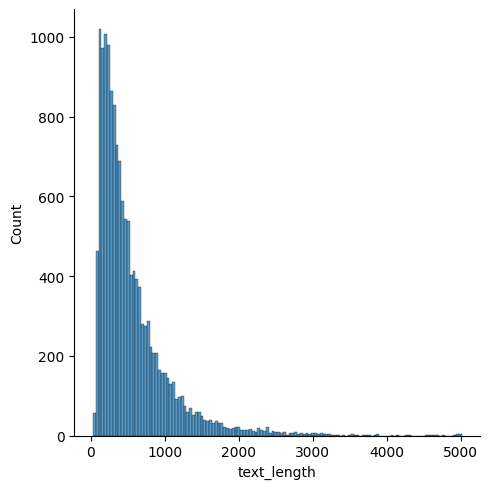

In [27]:
sns.displot(df, x="text_length")

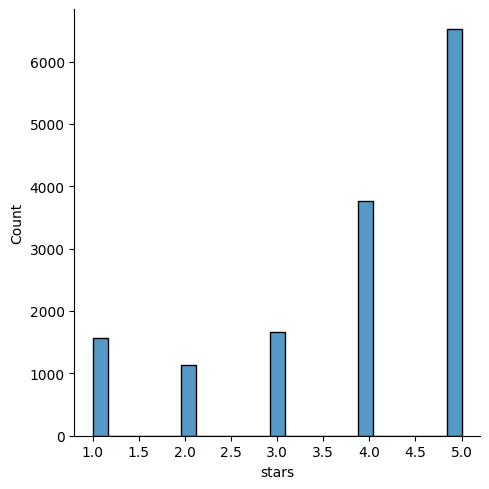

In [ ]:
sns.displot(df, x="stars")

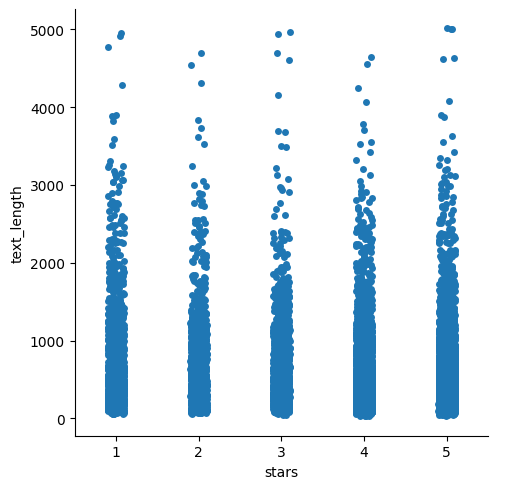

In [ ]:
sns.catplot(df, x="stars", y="text_length")

In [ ]:
import emoji

df["emoji_count"] = emoji.emoji_count(df.text.str.strip())

In [31]:
df.emoji_count.value_counts()

emoji_count
0    14630
Name: count, dtype: int64

---


## PART 2 — Text Cleaning

Perform following on the text.

-   lower all text
-   Remove html tags
-   Newlines
-   Extra whitespace
-   Emojis


In [ ]:
def lower_text(text: str):
    return text.lower()

In [37]:
import re

html_pattern = re.compile(r'<(\w+)\b[^>]*>.*?</\1>')

def remove_html_tags(text):
    text=html_pattern.sub("",text )
    return text

#### Pattern Breakdown:

1. **<(\w+) (The Opening Tag & Capture Group)**
    - `<`: Matches the literal "less than" character.
    - `(\w+)`: Matches one or more "word characters" (letters, digits, or underscores).
    - `(...)`: This is a capturing group. It "remembers" the tag name it found (e.g., div or span) so it can be used later in the pattern.
2. **\b[^>]\*> (Tag Attributes)**
    - `\b`: A word boundary anchor. It ensures the tag name is a whole word and doesn't bleed into other characters.
    - `[^>]\*`: Matches any character that is not a >. This allows the regex to match tags with attributes, such as `<div class="main">` or `<a href="...">`.
    - `>` : Matches the closing "greater than" character of the opening tag.
3. **.\*? (The Inner Content)**
    - `.`: Matches any character (except newlines, unless the "dot-all" flag is used).
    - `\*?`: A non-greedy quantifier. It tells the engine to match the smallest amount of text possible until it reaches the next part of the pattern (the closing tag). Without the ?, it might accidentally match from the first `<div>` to the very last `</div>` in your entire document.
4. **</\1> (The Closing Tag)**
    - `</`: Matches the literal characters starting a closing tag.
    - `\1`: This is a backreference. It tells the regex engine to match the exact same text that was captured by the first group (\w+). If the opening tag was <div>, \1 will only match div.
    - `>` : Matches the literal end of the closing tag.


In [38]:
import re

new_line_pattern = re.compile(r"\n")

def remove_new_lines(text):
    text = new_line_pattern.sub(" ", text)
    return text

In [ ]:
import re

multiple_white_space_pattern = re.compile(r'\s{2, }')

def remove_white_space(text):
    text = multiple_white_space_pattern.sub(' ', text)
    return text

In [ ]:
import emoji

def remove_emoji(text):
    text = emoji.replace_emoji(text, '')
    return text

#### Creating Scikit learn pipeline to apply this transformation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

lower_text_transformer = FunctionTransformer(lower_text)
remove_html_tags_transformer = FunctionTransformer(remove_html_tags)
remove_new_lines_transformer = FunctionTransformer(remove_new_lines)
remove_white_space_transformer = FunctionTransformer(remove_white_space)
remove_emoji_transformer = FunctionTransformer(remove_emoji)


text_cleaning_pipeline = Pipeline(
    [
        ("to_lowercase", lower_text_transformer),
        ("remove_html_tags", remove_html_tags_transformer),
        ("remove new line sep", remove_new_lines_transformer)(
            "extra white space remover", remove_white_space_transformer
        ),
        ("remove emoji", remove_emoji_transformer),
        # You might stop here if you plan to use a vectorizer next (e.g., CountVectorizer)
        # ('tokenize', tokenizer_transformer)
    ]
)

---
